<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

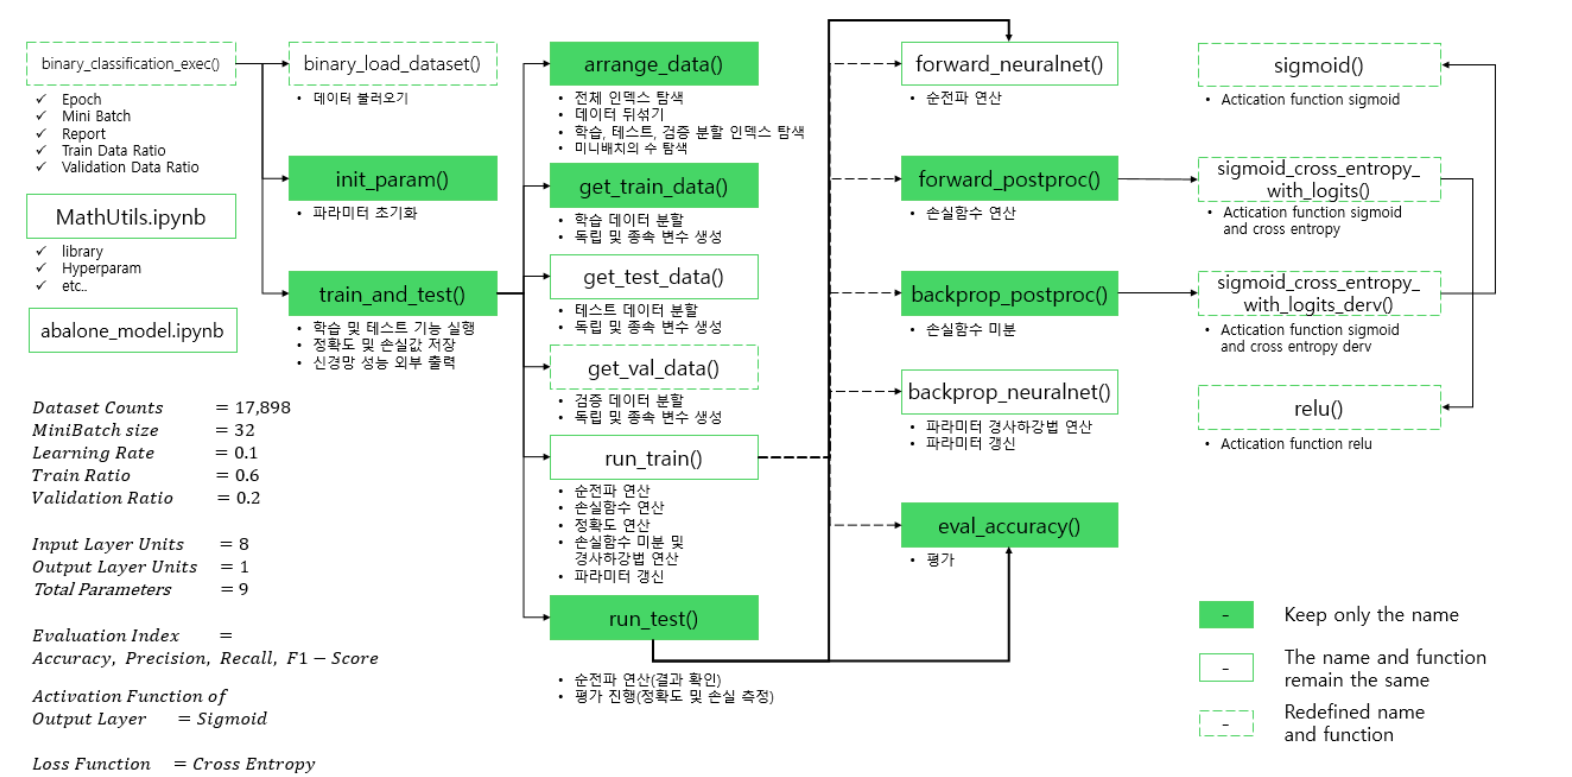

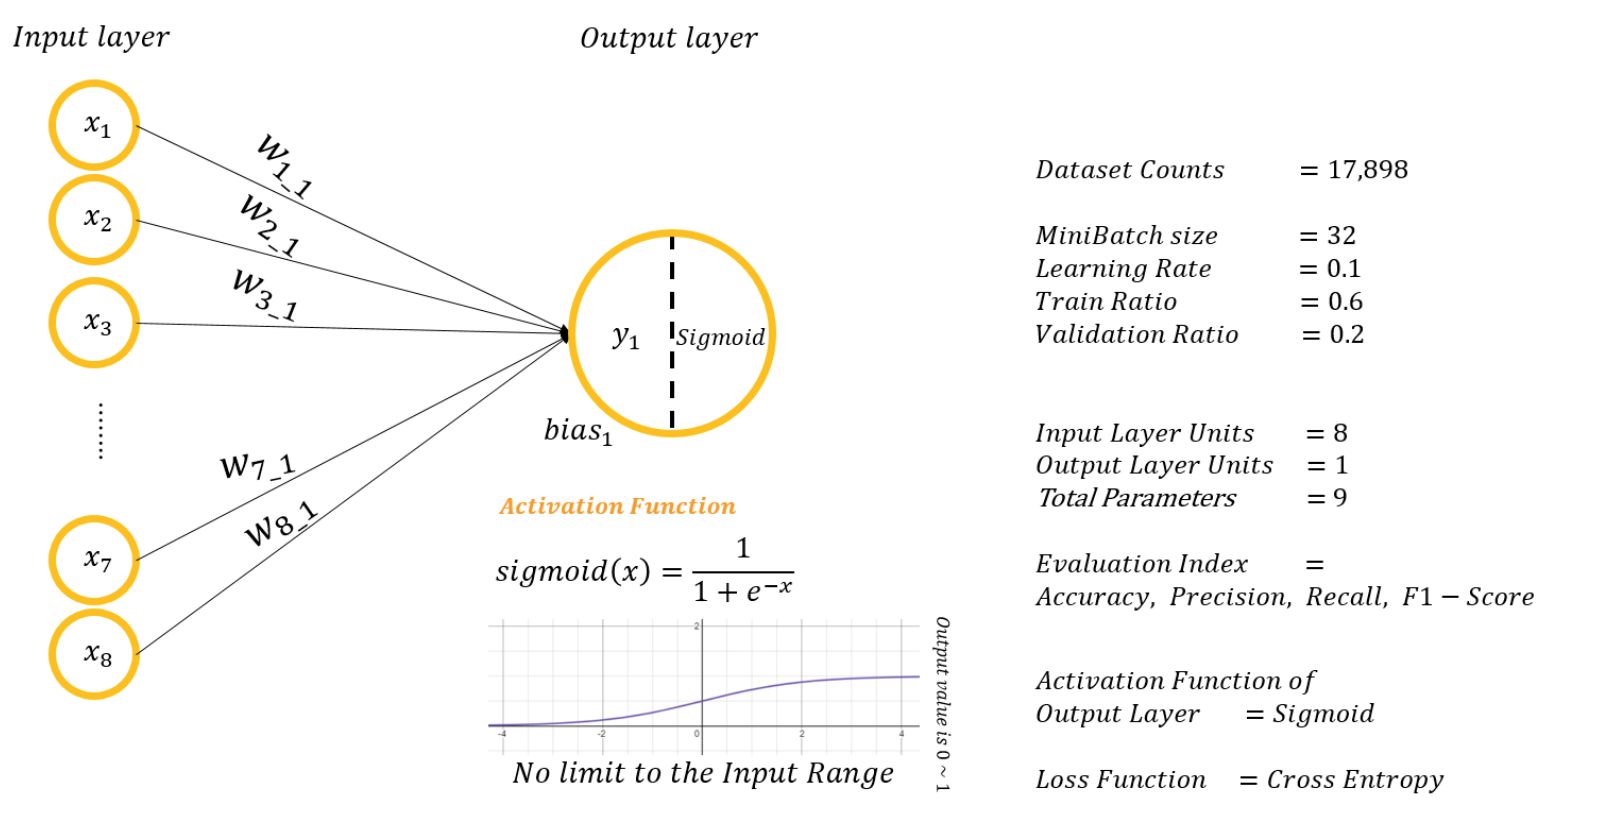

# 첫 번째 출력 예제

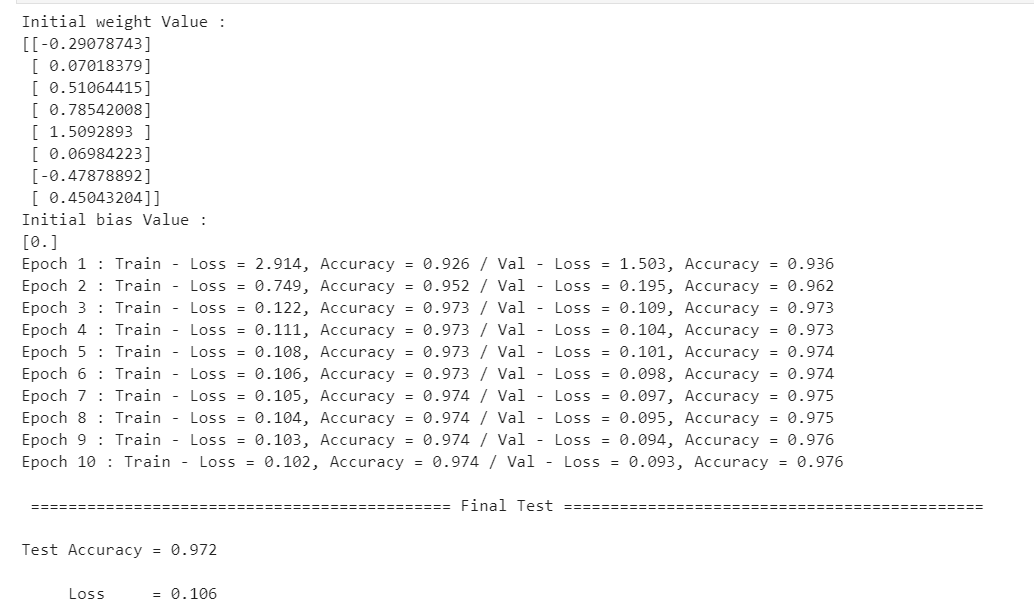

# 두 번째 출력 예제

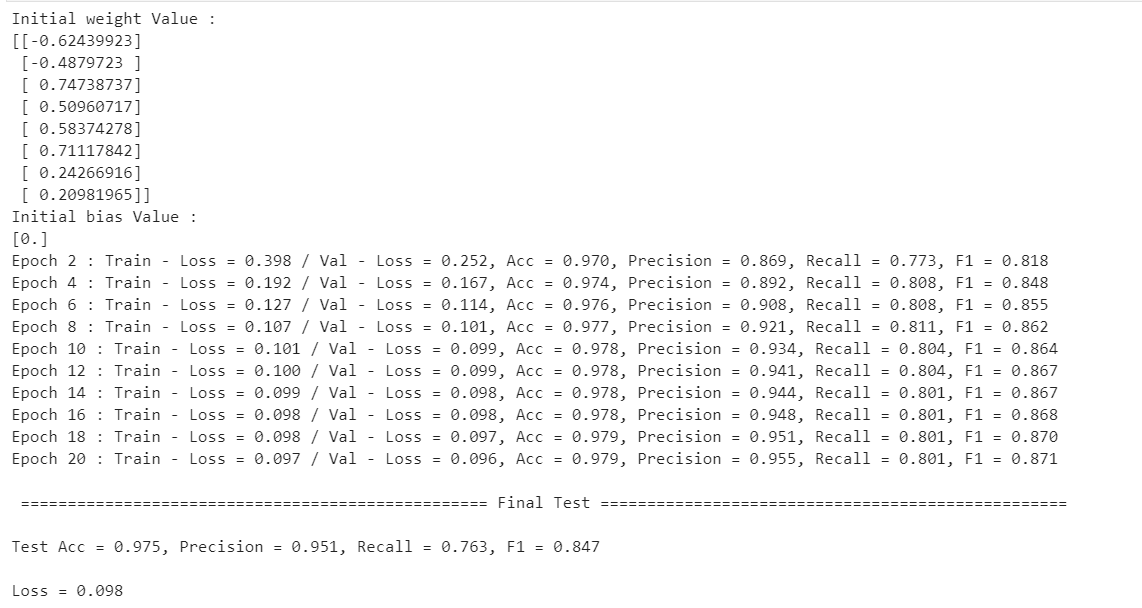

# 시각화 예제

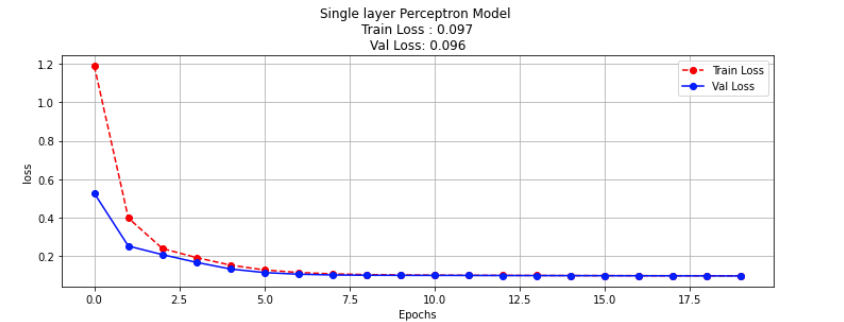

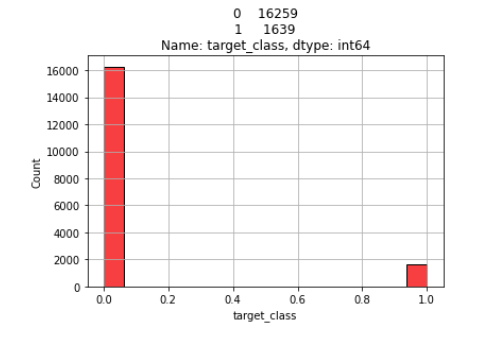

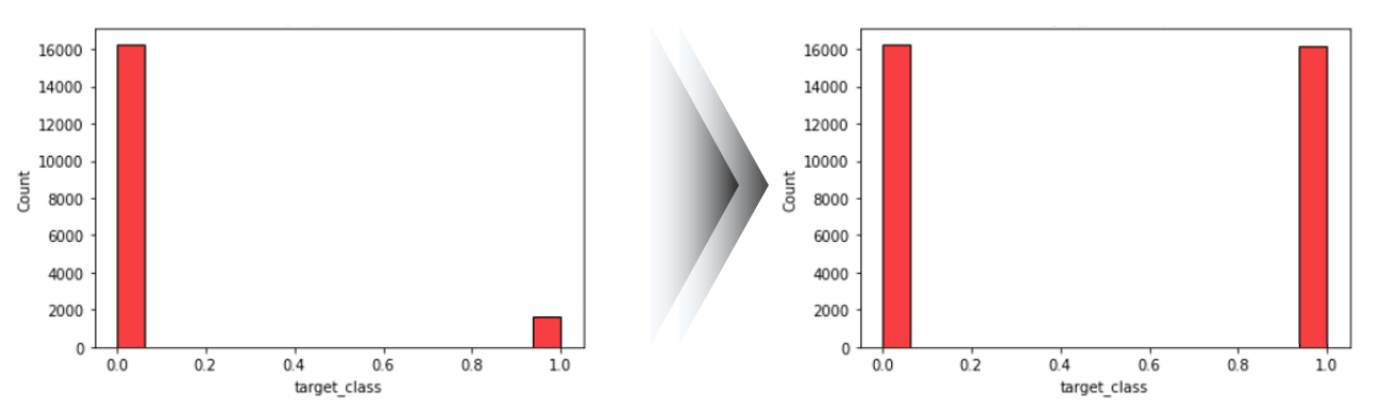

In [6]:
%run /content/MathUtils.ipynb

In [7]:
%run /content/abalone_model.ipynb

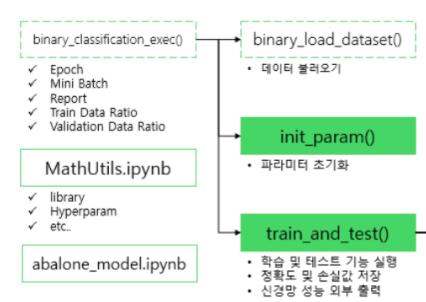

In [8]:
def binary_classification_exec(epoch_count = 10, mb_size = 10, report = 1, train_ratio = 0.6, val_ratio = 0.2):
    binary_load_dataset()
    init_param()
    train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio)

    return train_metrics_mean_row, val_metrics_row, test_metrics

In [9]:
def binary_load_dataset():
    # 실제로 실험을 진행할 때 사용되는 코드.
    with open('/content/pulsar_stars.csv') as csvfile:
    #with open('/content/pulsar_stars_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        rows = []
        for row in csvreader:
            rows.append(row)

    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 8, 1
    data = np.asarray(rows, dtype='float32')

In [10]:
# 예제 코드
def binary_load_dataset_test():
    # 실제로 실험을 진행할 때 사용되는 코드.
    with open('/content/pulsar_stars.csv') as csvfile:
    #with open('/content/pulsar_stars_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        rows = []
        for row in csvreader:
            rows.append(row)

    return rows

#    input_cnt, output_cnt = 8, 1
#    data = np.asarray(rows, dtype='float32')

rows = binary_load_dataset_test()

type(rows[0][0])

str

In [11]:
binary_load_dataset()

In [12]:
print("data.shape : ", data.shape)
print(data[:3])

data.shape :  (17898, 9)
[[140.5625      55.68378     -0.23457141  -0.6996484    3.1998327
   19.110426     7.9755316   74.242226     0.        ]
 [102.50781     58.88243      0.46531814  -0.5150879    1.6772575
   14.860146    10.576487   127.39358      0.        ]
 [103.015625    39.34165      0.32332838   1.0511644    3.1212375
   21.744669     7.735822    63.17191      0.        ]]


In [13]:
def init_param():
    global weight, bias 

# 기능 축소
#    weight_initial = []
#    bias_initial   = []
    # input_cnt = 8, output_cnt = 1
    weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
    bias   = np.zeros([output_cnt])
    print("Initial Weight Value : \n{}".format(weight))
    print("Initial Bias Value : \n{}".format(bias))

#    weight_initial.append(weight)
#    bias_initial.append(bias)

#    return weight_initial, bias_initial

In [14]:
init_param()

Initial Weight Value : 
[[ 0.027548  ]
 [-0.0222365 ]
 [-0.00653871]
 [ 0.07659972]
 [ 0.03731393]
 [ 0.00947163]
 [-0.01822363]
 [-0.02889094]]
Initial Bias Value : 
[0.]


In [15]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):
    pass

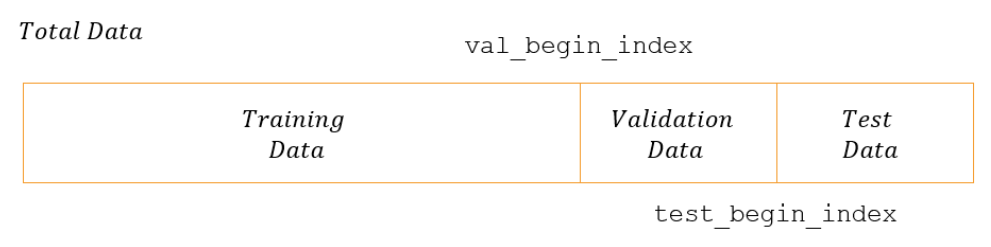

In [16]:
def arrange_data(mb_size, train_ratio, val_ratio):
    
    global shuffle_map, test_begin_index, val_begin_index

    shuffle_map = np.arange(data.shape[0])
    np.random.shuffle(shuffle_map)

    mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size

    val_begin_index  = mini_batch_step_count * mb_size
    test_begin_index = int(val_begin_index + (val_ratio * data.shape[0])) 

    return mini_batch_step_count

In [17]:
mini_batch_step_count = arrange_data(mb_size=1, train_ratio=0.6, val_ratio=0.2)

In [18]:
print("mini_batch_step_count : ", mini_batch_step_count)
print("val_begin_index       : ", val_begin_index)
print("test_begin_index      : ", test_begin_index)

mini_batch_step_count :  10738
val_begin_index       :  10738
test_begin_index      :  14317


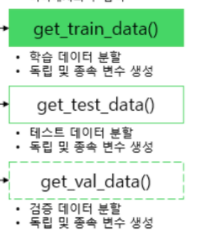

In [19]:
#  n : 미니배치 카운트 값
def get_train_data(mb_size, n):
#    if n == 0:
#        np.random.shuffle(shuffle_map[:test_begin_index])

    from_idx = n * mb_size 
    to_idx   = (n+1) * mb_size

#    train_data = data[shuffle_map[mb_size * n : mb_size * (n+1) ]]
    train_data = data[shuffle_map[from_idx:to_idx]]

    return train_data[ : , : -output_cnt], train_data[ : , -output_cnt : ]

# 이미 구축해 놓은 함수이기때문에 따로 다시 구축할 필요 없습니다.
def get_test_data():
    test_data = data[shuffle_map[test_begin_index:]]
    return test_data[ : , : -output_cnt], test_data[ : , -output_cnt : ]

def get_val_data():
    val_data = data[shuffle_map[ val_begin_index : test_begin_index ]]

    return val_data[:, : -output_cnt], val_data[:, -output_cnt : ]

In [20]:
train_x, train_y = get_train_data(mb_size = 6, n = 0)
val_x, val_y     = get_val_data()
test_x, test_y   = get_test_data()

In [21]:
print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(6, 8) (6, 1)
(3579, 8) (3579, 1)
(3581, 8) (3581, 1)


In [22]:
def run_train(x, y):
    loss     = 0
    accuracy = 100

    return loss, accuracy

def run_test(x, y):
    loss     = 0
    accuracy = 100

    return loss, accuracy

In [23]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):

    mini_batch_step_count = arrange_data(mb_size, train_ratio, val_ratio)

    test_x, test_y = get_test_data()
    val_x, val_y   = get_val_data()

    val_loss_row, val_acc_row      = [], []
    losses_mean_row, accs_mean_row = [], []

    # 에폭에 따른 반복문
    for epoch in range(epoch_count):

        losses, accs = [], []

        # 배치에 따른 반복문
        for n in range(mini_batch_step_count):
            
            # 학습 데이터 학습 과정
            train_x, train_y = get_train_data(mb_size, n)

            loss, acc        = run_train(train_x, train_y)

            losses.append(loss)
            accs.append(acc)
        
        #검증 데이터 검증 과정
        val_loss, val_acc = run_test(val_x, val_y)
        val_loss_row.append(val_loss)
        val_acc_row.append(val_acc)

        if report > 0 and (epoch + 1) % report == 0:
            print("Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f} / Val - Loss = {:.3f}, Accuracy = {:.3f}".\
                  format(epoch + 1, np.mean(losses), np.mean(accs), val_loss, val_acc))

        # 학습 데이터에 대한 평균값(에폭에 따른 평가 지표값)    
        losses_mean = np.mean(losses)
        accs_mean   = np.mean(accs)

        losses_mean_row.append(losses_mean)
        # 코드 에러 부분 ! ▼ (수정 완료 - accs -> accs_mean)    
        accs_mean_row.append(accs_mean)

    # 코드 에러 부분 ! ▼ (수정 완료 - 들여쓰기)
    # 테스트 데이터로 테스트 하는 과정
    test_loss, test_acc = run_test(test_x, test_y)

    print("\n","=" * 40, "Final Test", "=" * 40)
    print("\nTest Accuracy : {:.3f}".format(test_acc))
    print("\nTest Loss     : {:.3f}".format(test_loss))

    return [losses_mean_row, accs_mean_row], [val_loss_row, val_acc_row], [test_loss, test_acc]

In [24]:
train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count = 10, 
                                                                       mb_size     = 1, 
                                                                       report      = 1, 
                                                                       train_ratio = 0.6, 
                                                                       val_ratio   = 0.2)

Epoch 1 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 2 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 3 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 4 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 5 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 6 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 7 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 8 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 9 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 10 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000

 ======================================== Final Test =========================

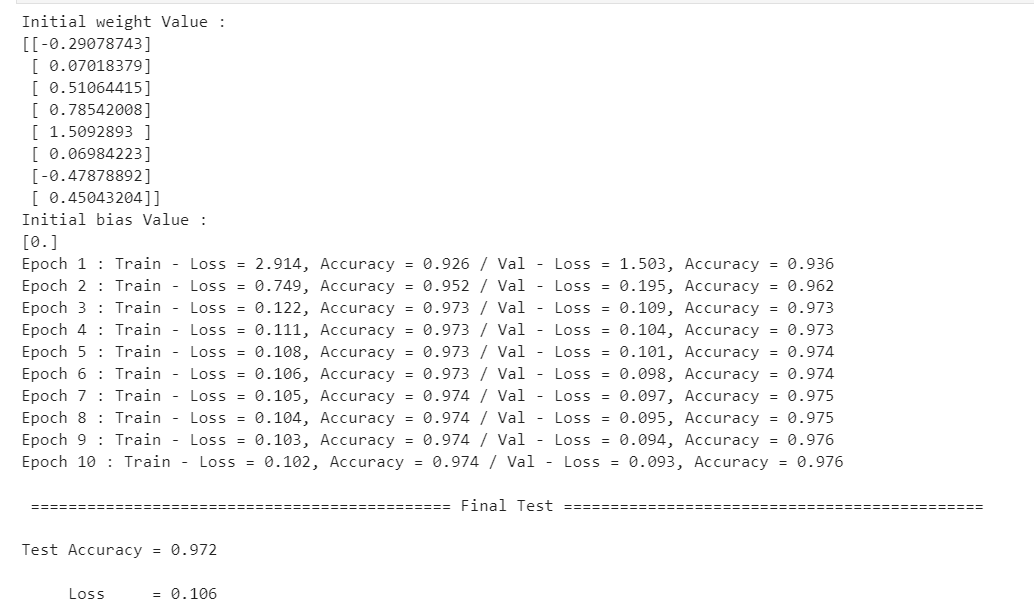

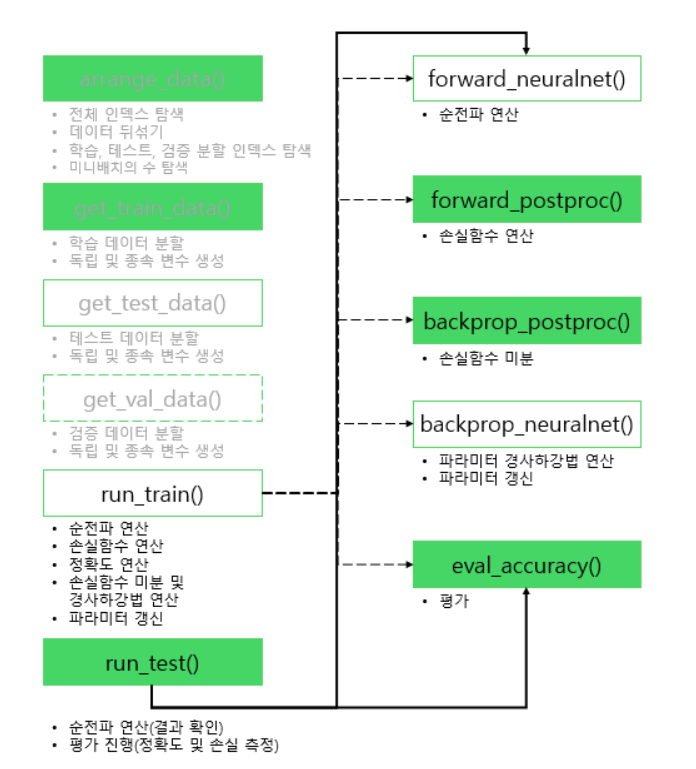

In [25]:
def forward_neuralnet(x):
    y_hat = np.matmul(x, weight) + bias
    return y_hat, x

In [26]:
y_hat, _ = forward_neuralnet(train_x)
print("y_hat : \n",y_hat)

y_hat : 
 [[ -3.35256152]
 [  2.5685879 ]
 [ -3.48433326]
 [-11.10534012]
 [  7.41246806]
 [  0.49246936]]


In [27]:
train_x

array([[ 1.20250000e+02,  5.12573166e+01,  2.20746458e-01,
         1.20629199e-01,  2.01003337e+00,  1.19103355e+01,
         1.13891754e+01,  1.90837738e+02],
       [ 1.22945312e+02,  5.66406326e+01,  9.88785252e-02,
        -4.76678848e-01,  1.22976589e+01,  4.39007683e+01,
         3.55190253e+00,  1.14782305e+01],
       [ 1.44398438e+02,  5.02755432e+01, -2.36908928e-01,
        -3.43859315e-01,  1.32775915e+00,  1.18605156e+01,
         1.29900713e+01,  2.16145065e+02],
       [ 1.40992188e+02,  5.24297905e+01, -2.40785211e-01,
        -4.87395495e-01,  9.68227446e-01,  9.34138775e+00,
         1.90361710e+01,  4.69540802e+02],
       [ 7.81093750e+01,  3.73760948e+01,  2.04418850e+00,
         6.12650776e+00,  1.28408020e+02,  8.47045364e+01,
        -2.89140970e-01, -1.27845049e+00],
       [ 1.25265625e+02,  4.88123779e+01,  1.48849532e-01,
         1.89203024e-01,  3.51588631e+00,  2.34795265e+01,
         8.22811127e+00,  7.23439789e+01]], dtype=float32)

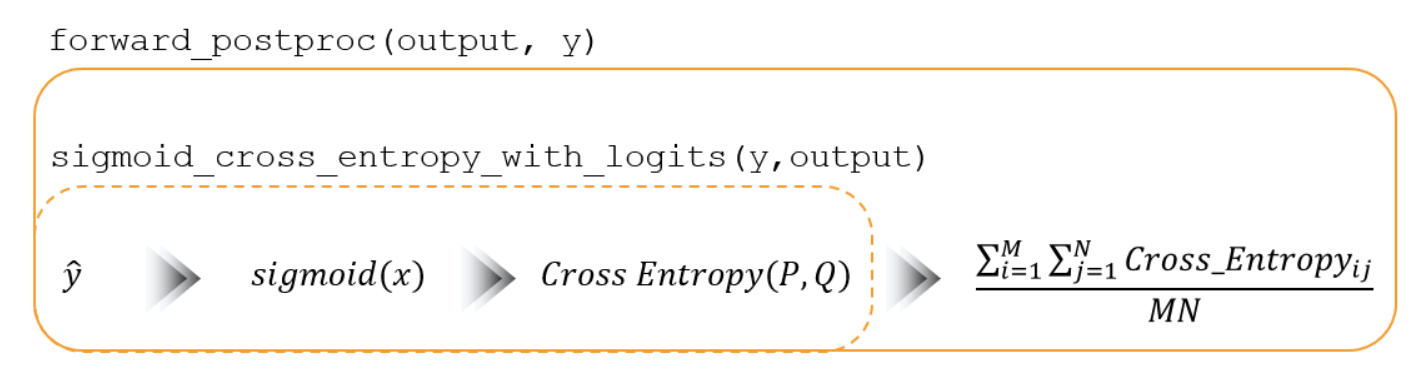

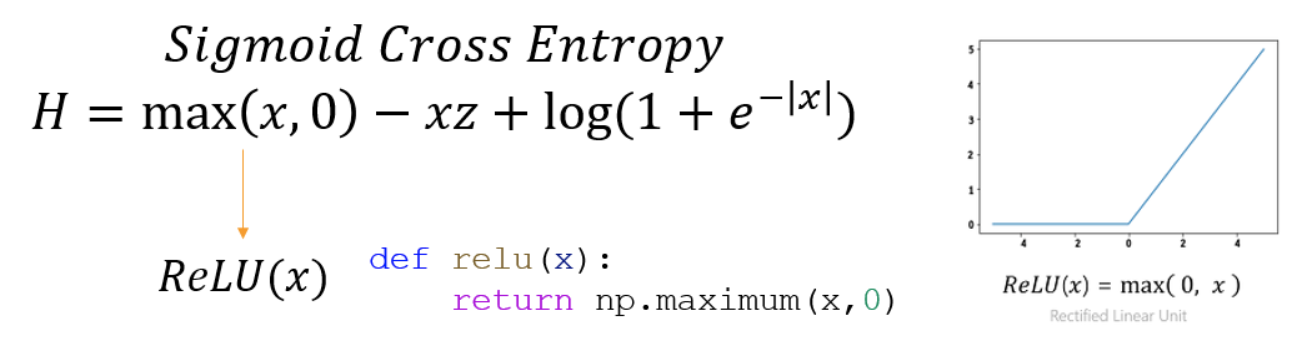

In [28]:
# z 실제 y값 / x는 신경망의 연산 결과 
def sigmoid_cross_entrop_with_logits(z, x):
    return relu(x) - x * z + np.log( 1 + np.exp(-np.abs(x)))

In [29]:
def relu(x):
    return np.maximum(x,0)

In [30]:
relu(-152)

0

In [31]:
CEE = sigmoid_cross_entrop_with_logits(z = train_y, x = y_hat)
print("CEE : \n", CEE)

CEE : 
 [[3.43962093e-02]
 [2.64243642e+00]
 [3.02131544e-02]
 [1.50317244e-05]
 [6.03496796e-04]
 [9.69396135e-01]]


In [32]:
CEE.shape

(6, 1)

In [33]:
train_y

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

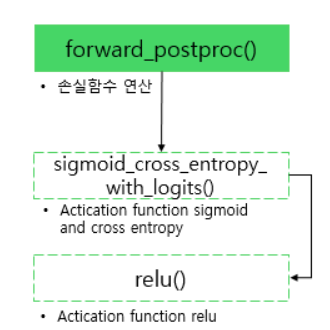

In [34]:
def forward_postproc(output, y):
    CEE  = sigmoid_cross_entrop_with_logits(y, output)
    loss = np.mean(CEE)

    return loss, [y, output, CEE]

In [35]:
loss = forward_postproc(y_hat, train_y)

In [36]:
print("loss : ", loss)

loss :  (0.6128434076954508, [array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32), array([[ -3.35256152],
       [  2.5685879 ],
       [ -3.48433326],
       [-11.10534012],
       [  7.41246806],
       [  0.49246936]]), array([[3.43962093e-02],
       [2.64243642e+00],
       [3.02131544e-02],
       [1.50317244e-05],
       [6.03496796e-04],
       [9.69396135e-01]])])


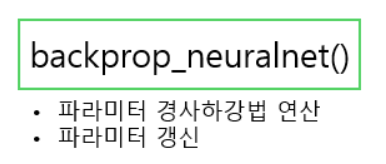

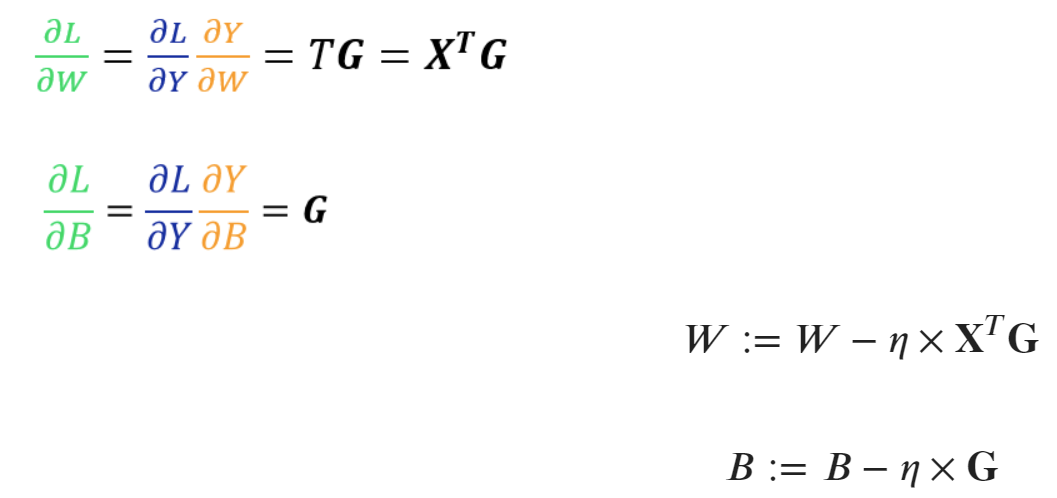

In [37]:
def backprop_neuralnet(G_output, x):
    global weight, bias 

    x_transpose = x.transpose()
    G_w = np.matmul(x_transpose, G_output)
    
    G_b = np.sum(G_output, axis = 0)

    weight -= LEARNING_RATE * G_w
    bias   -= LEARNING_RATE * G_b

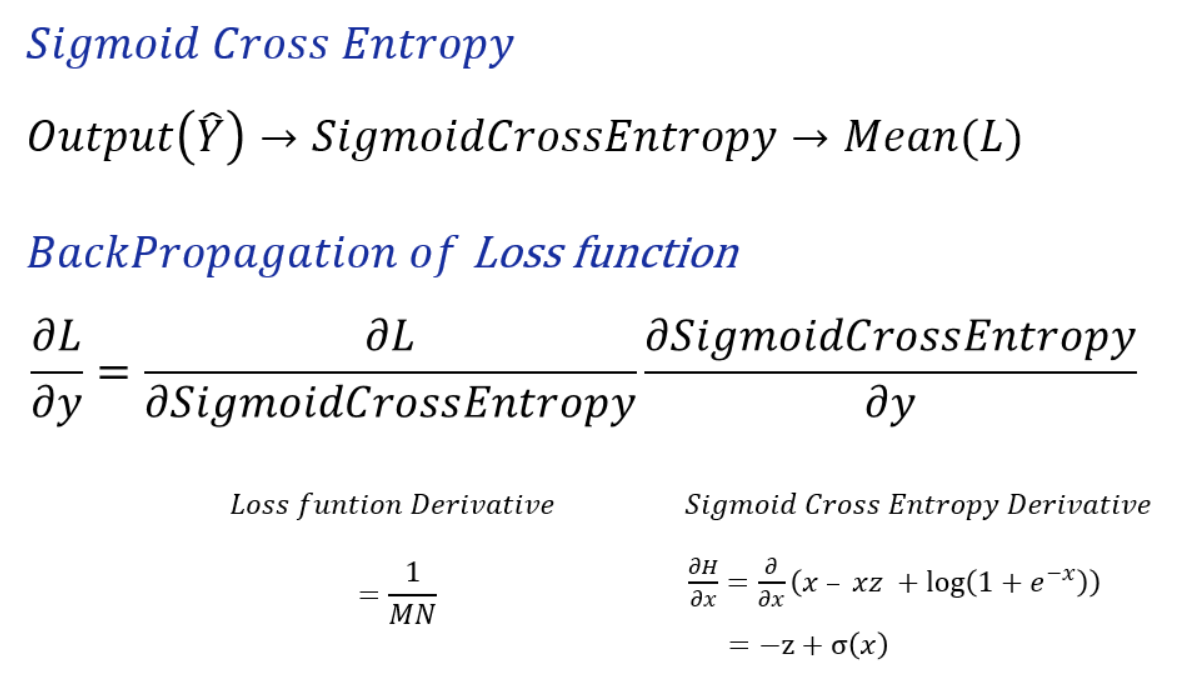

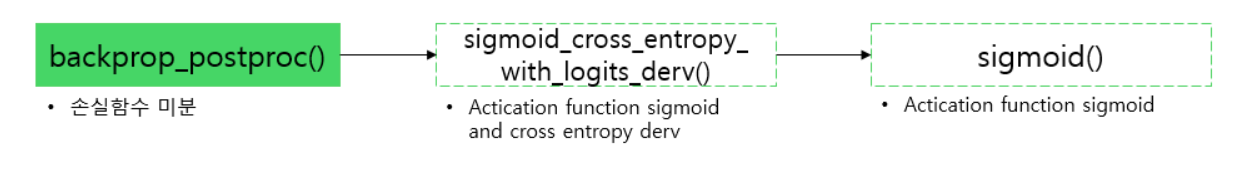

In [38]:
def sigmoid_cross_entrop_with_logits_derv(z, x):
    return -z + sigmoid(x)

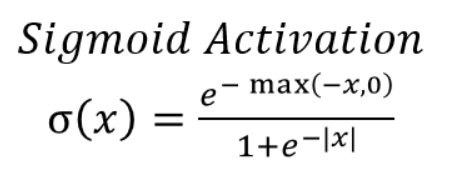

In [39]:
def sigmoid(x):
    return np.exp(-relu(-x)) / (1.0 + np.exp(-np.abs(x)))

In [40]:
sigmoid(train_y)

array([[0.5      ],
       [0.5      ],
       [0.5      ],
       [0.5      ],
       [0.7310586],
       [0.5      ]], dtype=float32)

In [41]:
result = sigmoid_cross_entrop_with_logits_derv(train_y, y_hat)
print("result :\n",result)

result :
 [[ 3.38113841e-02]
 [ 9.28812385e-01]
 [ 2.97612992e-02]
 [ 1.50316114e-05]
 [-6.03314728e-04]
 [ 6.20687978e-01]]


In [42]:
def backprop_postproc(aux_pp_y_output_CEE):

    y, output, CEE = aux_pp_y_output_CEE

    g_loss_entropy    = 1.0/ np.prod(CEE.shape)
    g_entropy_output  = sigmoid_cross_entrop_with_logits_derv(y, output)

    G_output = g_entropy_output * g_loss_entropy 

    return G_output

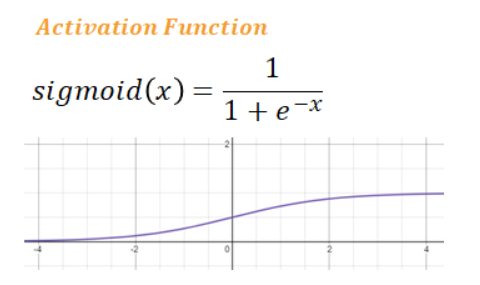

In [43]:
output_list = [-10, -5, 0, 5, 15]

for output in output_list:
    result = sigmoid(output)
    print(np.round(result))

0.0
0.0
0.0
1.0
1.0


In [44]:
output_list = [-10, -5, 0, 5, 15]

for output in output_list:
    print(np.greater(output,0))

False
False
False
True
True


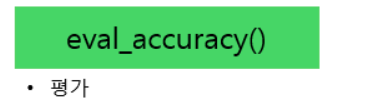

In [45]:
def eval_accuracy(output, y):
    estimate = np.greater(output, 0)

    answer   = np.greater(y, 0.5)

    correct = np.equal(estimate, answer)

    return np.mean(correct)

In [46]:
acc = eval_accuracy(y_hat, train_y)
print("ACC : {:.3f} %".format(acc * 100))

ACC : 66.667 %


In [47]:
print(y_hat)
print("==============")
print(train_y)

[[ -3.35256152]
 [  2.5685879 ]
 [ -3.48433326]
 [-11.10534012]
 [  7.41246806]
 [  0.49246936]]
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [48]:
estimate = np.greater(y_hat, 0)
print(estimate)

[[False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]]


In [49]:
answer   = np.greater(train_y, 0.5)
print(answer)

[[False]
 [False]
 [False]
 [False]
 [ True]
 [False]]


In [50]:
correct = np.equal(estimate, answer)
print(correct)

[[ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]]


In [51]:
np.mean(correct)

0.6666666666666666

In [52]:
def run_train(x, y):
    y_hat, aux_nn_x           = forward_neuralnet(x)
    loss, aux_pp_y_output_CEE = forward_postproc(y_hat, y)

    accuracy = eval_accuracy(y_hat, y)

    G_output = backprop_postproc(aux_pp_y_output_CEE)
    backprop_neuralnet(G_output, aux_nn_x)

    return loss, accuracy

In [53]:
def run_test(x, y):
    y_hat, _ = forward_neuralnet(x)
    loss, _  = forward_postproc(y_hat, y)
    accuracy = eval_accuracy(y_hat, y)

    return loss, accuracy

In [54]:
train_metrics_mean_row, val_metrics_row, test_metrics = binary_classification_exec(epoch_count = 100, 
                                                                                   mb_size = 32, 
                                                                                   report = 1, 
                                                                                   train_ratio = 0.6, 
                                                                                   val_ratio = 0.2) 

Initial Weight Value : 
[[ 0.01900876]
 [ 0.0131311 ]
 [-0.0478393 ]
 [-0.00109383]
 [ 0.04471787]
 [-0.01335065]
 [-0.03490133]
 [ 0.0080516 ]]
Initial Bias Value : 
[0.]
Epoch 1 : Train - Loss = 9.324, Accuracy = 0.936 / Val - Loss = 7.348, Accuracy = 0.961
Epoch 2 : Train - Loss = 9.449, Accuracy = 0.947 / Val - Loss = 9.814, Accuracy = 0.924
Epoch 3 : Train - Loss = 7.299, Accuracy = 0.953 / Val - Loss = 5.666, Accuracy = 0.898
Epoch 4 : Train - Loss = 7.175, Accuracy = 0.952 / Val - Loss = 8.939, Accuracy = 0.783
Epoch 5 : Train - Loss = 8.345, Accuracy = 0.951 / Val - Loss = 3.784, Accuracy = 0.915
Epoch 6 : Train - Loss = 7.505, Accuracy = 0.953 / Val - Loss = 5.461, Accuracy = 0.899
Epoch 7 : Train - Loss = 6.610, Accuracy = 0.954 / Val - Loss = 3.599, Accuracy = 0.977
Epoch 8 : Train - Loss = 8.521, Accuracy = 0.952 / Val - Loss = 3.040, Accuracy = 0.929
Epoch 9 : Train - Loss = 6.539, Accuracy = 0.953 / Val - Loss = 6.183, Accuracy = 0.847
Epoch 10 : Train - Loss = 6.428, Acc

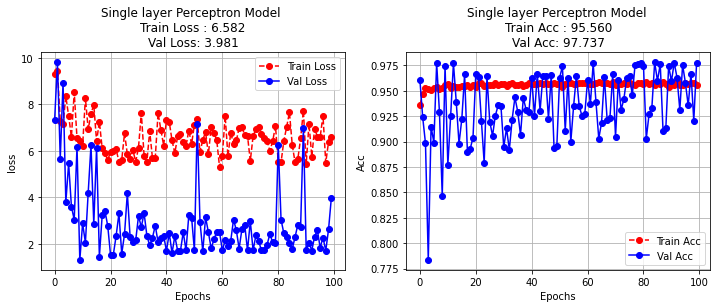

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(train_metrics_mean_row[0], '--o', color = 'red', label = 'Train Loss')
plt.plot(val_metrics_row[0], '-o', color = 'blue', label = 'Val Loss')

plt.title('Single layer Perceptron Model \nTrain Loss : {:.3f}\nVal Loss: {:.3f}'.format(train_metrics_mean_row[0][-1] , val_metrics_row[0][-1]))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(train_metrics_mean_row[1], '--o', color = 'red', label = 'Train Acc')
plt.plot(val_metrics_row[1], '-o', color = 'blue', label = 'Val Acc')

plt.title('Single layer Perceptron Model \nTrain Acc : {:.3f}\nVal Acc: {:.3f}'.format(train_metrics_mean_row[1][-1] * 100 , val_metrics_row[1][-1] * 100))
plt.xlabel('Epochs')
plt.ylabel('Acc')
#plt.ylim(0.9,1)
plt.grid()
plt.legend()

plt.show()

In [56]:
new_x = [44.796875, 
         30.17303209, 
         4.735203756, 
         27.96010082, 
         30.69314381, 
         61.82819804, 
         2.156630767, 
         3.773395708]

In [57]:
pred_Y, _ = forward_neuralnet(new_x)
print(pred_Y)

[673.21512271]


In [58]:
pred_Y_sigmoid = sigmoid(pred_Y)
print("pred_Y_sigmoid : ", pred_Y_sigmoid)

pred_Y_sigmoid :  [1.]


In [59]:
print("weight : \n", weight)
print("bias : \n", bias)

weight : 
 [[-2.64315589]
 [ 1.84633604]
 [13.7209217 ]
 [21.77179847]
 [-0.33658543]
 [ 1.15223312]
 [ 5.51449031]
 [-2.91310767]]
bias : 
 [0.38760588]


In [60]:
def binary_classification_exec(epoch_count = 10, mb_size = 10, report = 1, train_ratio = 0.6, val_ratio = 0.2, adjust_ratio = False):
    binary_load_dataset(adjust_ratio)
    init_param()
    train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio)

    return train_metrics_mean_row, val_metrics_row, test_metrics

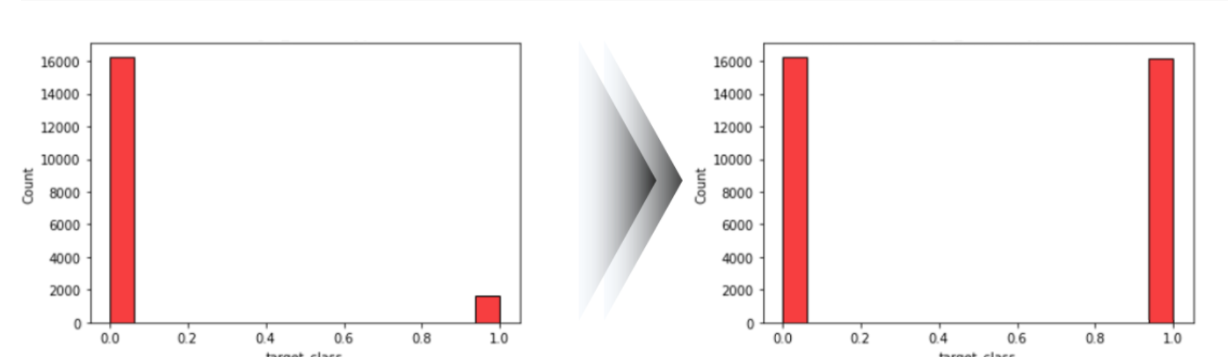

In [67]:
def binary_load_dataset(adjust_ratio):

    pulsars, stars = [], []

    with open('/content/pulsar_stars.csv') as csvfile:

        csvreader = csv.reader(csvfile)
        next(csvreader)
        
        for row in csvreader:
            if row[8] == '1' : pulsars.append(row)

            else:
                stars.append(row)

    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 8, 1

    star_cnt, pulsar_cnt = len(stars), len(pulsars)

    # 데이터 증폭 허용 
    if adjust_ratio:
        data = np.zeros([ star_cnt * 2 , 9 ])

        data[ 0:star_cnt , : ] = np.asarray(stars, dtype='float32')

        for n in range(star_cnt):

            data[star_cnt + n] = np.asarray(pulsars[n % pulsar_cnt], dtype='float32')


    # 데이터 증폭 불허
    else:
        data = np.zeros([star_cnt+pulsar_cnt , 9 ])
        data[ 0:star_cnt , : ] = np.asarray(stars, dtype='float32')
        data[star_cnt: , :] = np.asarray(pulsars, dtype = 'float32')

In [68]:
pulsars  = ['a', 'b', 'c', 'd']
star_cnt = 10
pulsar_cnt = len(pulsars)

for n in range(star_cnt):
    print("n :", n)
    print("pulsar_cnt :", pulsar_cnt)
    print("n % pulsar_cnt : ", n % pulsar_cnt)
    print("pulsars[n % pulsar_cnt] : ", pulsars[n % pulsar_cnt])
    print("===================================================")




pulsars[0]
pulsars[1]
pulsars[2]
pulsars[3]
pulsars[0]
pulsars[1]
pulsars[2]
pulsars[3]
pulsars[0]
pulsars[1]

n : 0
pulsar_cnt : 4
n % pulsar_cnt :  0
pulsars[n % pulsar_cnt] :  a
n : 1
pulsar_cnt : 4
n % pulsar_cnt :  1
pulsars[n % pulsar_cnt] :  b
n : 2
pulsar_cnt : 4
n % pulsar_cnt :  2
pulsars[n % pulsar_cnt] :  c
n : 3
pulsar_cnt : 4
n % pulsar_cnt :  3
pulsars[n % pulsar_cnt] :  d
n : 4
pulsar_cnt : 4
n % pulsar_cnt :  0
pulsars[n % pulsar_cnt] :  a
n : 5
pulsar_cnt : 4
n % pulsar_cnt :  1
pulsars[n % pulsar_cnt] :  b
n : 6
pulsar_cnt : 4
n % pulsar_cnt :  2
pulsars[n % pulsar_cnt] :  c
n : 7
pulsar_cnt : 4
n % pulsar_cnt :  3
pulsars[n % pulsar_cnt] :  d
n : 8
pulsar_cnt : 4
n % pulsar_cnt :  0
pulsars[n % pulsar_cnt] :  a
n : 9
pulsar_cnt : 4
n % pulsar_cnt :  1
pulsars[n % pulsar_cnt] :  b


'b'

In [69]:
binary_load_dataset(adjust_ratio = True)
print("adjust_ratio = True : ", data.shape)

binary_load_dataset(adjust_ratio = False)
print(data.shape)

adjust_ratio = True :  (32518, 9)
(17898, 9)


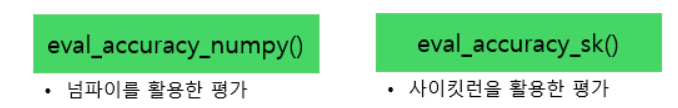

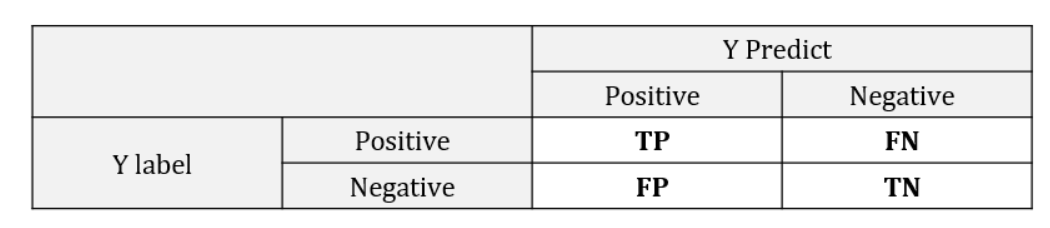

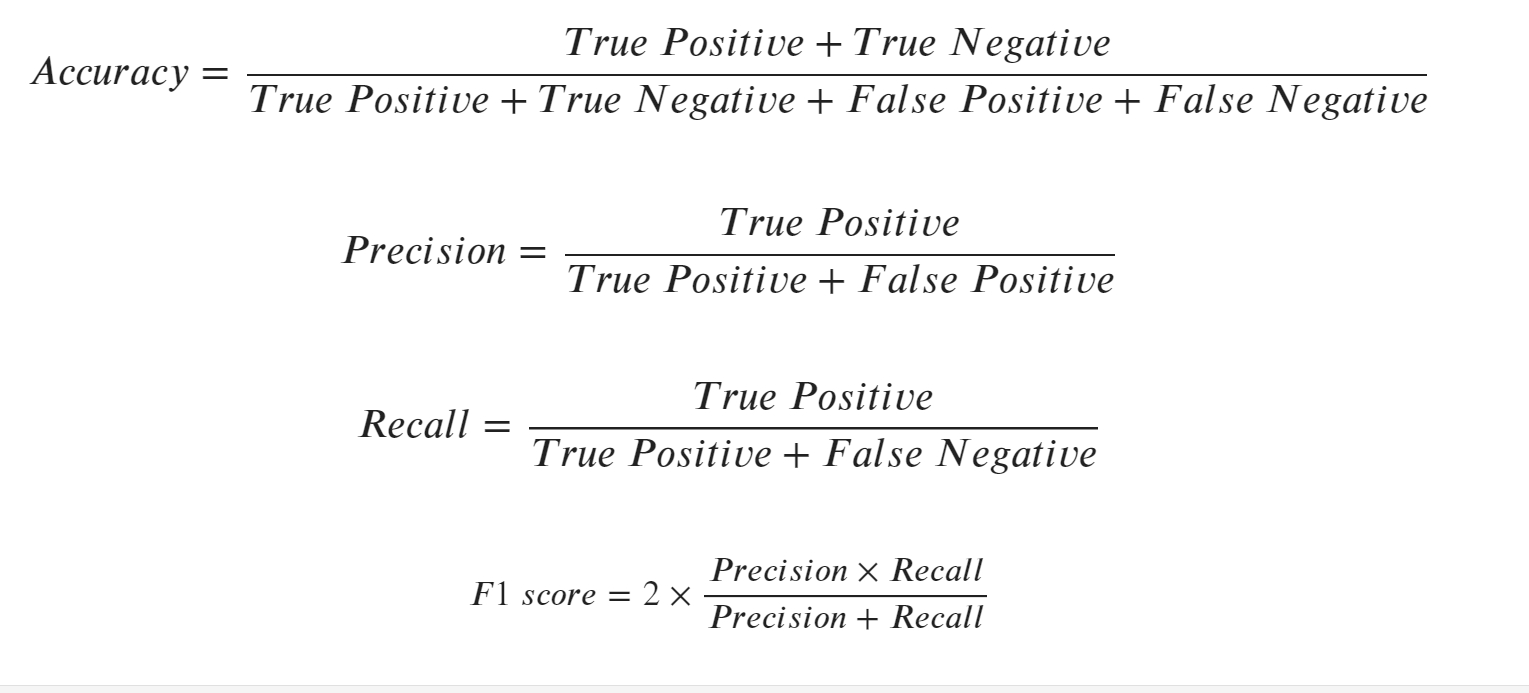

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [71]:
def eval_accuracy_sk(output,y):

    pred_Y = np.greater(output, 0)
    real_Y = np.greater(y, 0.5)
    
    accuracy = accuracy_score(real_Y, pred_Y)
    precision = precision_score(real_Y, pred_Y)
    recall = recall_score(real_Y, pred_Y)
    f1 = f1_score(real_Y, pred_Y)
    
    return [accuracy,precision,recall,f1]

In [73]:
metrics = eval_accuracy_sk(y_hat, train_y)
print(metrics)

[0.6666666666666666, 0.3333333333333333, 1.0, 0.5]


In [74]:
y_hat

array([[ -3.35256152],
       [  2.5685879 ],
       [ -3.48433326],
       [-11.10534012],
       [  7.41246806],
       [  0.49246936]])

In [75]:
train_y

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [76]:
def eval_accuracy_numpy(output,y):

    # 예측값을 0과 비교하여 줍니다. 
    # 예측값을 0과 비교하는 이유는 시그모이드 활성화 함수의 특징인데, 
    # 입력값이 음수인 경우는 출력값이 0.5 보다 작으니 0으로, 
    # 입력값이 양수인 경우는 출력값이 0.5 보다 크니 1로 판단할 수 있습니다.

    est_yes = np.greater(output,0)
    ans_yes = np.greater(y, 0.5)

    est_no = np.logical_not(est_yes) 
    ans_no = np.logical_not(ans_yes)


    # 마찬가지로 평가에 사용된 결과를 모두 더해 
    # 각각의 혼동행렬을 만들어 줍니다.  
    tp = np.sum(np.logical_and(est_yes, ans_yes))
    tn = np.sum(np.logical_and(est_no, ans_no))
    fp = np.sum(np.logical_and(ans_no, est_yes))
    fn = np.sum(np.logical_and(ans_yes, est_no))

    # 다음은 정확도 측정 지표를 만들어 줍니다. 
    # 이때 나눗셈의 경우 0으로 나눠지는 경우가 
    # 발생할 수 있기에, 
    # 이 점을 고려하여 안전한 나눗셈 함수를 만들어 주겠습니다. 
    accuracy = safe_div(tp+tn,tp+fp+fn+tn)
    precision = safe_div(tp,tp+fp)
    recall = safe_div(tp,tp+fn)
    f1 = 2 * safe_div(recall*precision,recall+precision)
    
    return [accuracy, precision, recall, f1]

In [77]:
def safe_div(p, q):
    p, q = float(p), float(q)
    if np.abs(q) < 1.0e-20:
        return np.sign(p)
    return p / q

In [79]:
safe_div(0, 0)

0.0

In [91]:
def run_test(x, y):
    y_hat, _ = forward_neuralnet(x)
    loss, _  = forward_postproc(y_hat, y)
    accuracy = eval_accuracy_numpy(y_hat, y)

    return loss, accuracy

In [92]:
def run_train(x, y):
    y_hat, aux_nn_x           = forward_neuralnet(x)
    loss, aux_pp_y_output_CEE = forward_postproc(y_hat, y)

    accuracy = eval_accuracy_numpy(y_hat, y)

    G_output = backprop_postproc(aux_pp_y_output_CEE)
    backprop_neuralnet(G_output, aux_nn_x)

    return loss, accuracy

In [93]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):

    mini_batch_step_count = arrange_data(mb_size,train_ratio, val_ratio)

    test_x, test_y = get_test_data()
    val_x,  val_y  = get_val_data()

    losses_mean_row = []
    val_loss_row    = []

    #losses_mean_row, accs_mean_row = [], []
    #val_loss_row, val_acc_row      = [], []
    
    for epoch in range(epoch_count):

        losses = []
        #accs = []

        for n in range(mini_batch_step_count):
            train_x, train_y  = get_train_data(mb_size, n)
           
            loss, _           = run_train(train_x,train_y)
               
            losses.append(loss)
            #accs.append(acc)

        val_loss, val_acc = run_test(val_x, val_y)
        val_loss_row.append(val_loss)
        #val_acc_row.append(val_acc)  

        if report > 0 and (epoch+1) % report == 0:
            
            print("Epoch {} : Train - Loss = {:.3f} / Val - Loss = {:.3f}, Acc = {:.3f}, Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3F}".\
                  format(epoch+1, np.mean(losses), val_loss, val_acc[0], val_acc[1], val_acc[2], val_acc[3]))
            
        losses_mean = np.mean(losses) 
        #accs_mean = np.mean(accs)

        losses_mean_row.append(losses_mean)  
        #accs_mean_row.append(accs_mean)   



    test_loss, test_acc = run_test(test_x, test_y)
    
    print("\n","=" * 50, 'Final Test', '=' * 50)
    print('\nTest Acc = {:.3f}, Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3F}'.\
          format(test_acc[0], test_acc[1], test_acc[2], test_acc[3]))
    print('\nLoss = {:.3f}'.format(test_loss))

    #return [losses_mean_row, accs_mean_row], [val_loss_row, val_acc_row], [test_loss , test_acc]
    return [losses_mean_row], [val_loss_row], [test_loss , test_acc]

In [85]:
metrics = train_and_test(epoch_count = 5, mb_size = 32, report = 1, train_ratio = 0.6, val_ratio = 0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


Epoch 1 : Train - Loss = 3.370 / Val - Loss = 2.626, Acc = 0.977, Precision = 0.939, Recall = 0.787, F1 = 0.856
Epoch 2 : Train - Loss = 4.438 / Val - Loss = 2.792, Acc = 0.978, Precision = 0.950, Recall = 0.787, F1 = 0.861
Epoch 3 : Train - Loss = 4.987 / Val - Loss = 1.779, Acc = 0.968, Precision = 0.795, Recall = 0.863, F1 = 0.827
Epoch 4 : Train - Loss = 3.674 / Val - Loss = 1.791, Acc = 0.974, Precision = 0.862, Recall = 0.838, F1 = 0.850
Epoch 5 : Train - Loss = 3.870 / Val - Loss = 2.341, Acc = 0.971, Precision = 0.806, Recall = 0.876, F1 = 0.840

 ================================================== Final Test ==================================================

Test Acc = 0.969, Precision = 0.815, Recall = 0.848, F1 = 0.831

Loss = 2.954


In [86]:
train_metrics_mean_row, val_metrics_row, test_metrics = binary_classification_exec(epoch_count = 100, 
                                                                                   mb_size = 32, 
                                                                                   report = 10, 
                                                                                   train_ratio = 0.6, 
                                                                                   val_ratio = 0.2, 
                                                                                   adjust_ratio = False)


Initial Weight Value : 
[[-0.01817359]
 [ 0.0665151 ]
 [ 0.02239458]
 [ 0.02809919]
 [-0.00464562]
 [-0.04271318]
 [ 0.01725875]
 [-0.00687784]]
Initial Bias Value : 
[0.]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


Epoch 10 : Train - Loss = 4.897 / Val - Loss = 5.142, Acc = 0.967, Precision = 0.847, Recall = 0.800, F1 = 0.823
Epoch 20 : Train - Loss = 7.251 / Val - Loss = 2.268, Acc = 0.937, Precision = 0.624, Recall = 0.881, F1 = 0.731
Epoch 30 : Train - Loss = 5.988 / Val - Loss = 1.954, Acc = 0.957, Precision = 0.736, Recall = 0.864, F1 = 0.795
Epoch 40 : Train - Loss = 6.161 / Val - Loss = 2.204, Acc = 0.954, Precision = 0.716, Recall = 0.870, F1 = 0.785
Epoch 50 : Train - Loss = 5.909 / Val - Loss = 2.313, Acc = 0.947, Precision = 0.671, Recall = 0.881, F1 = 0.762
Epoch 60 : Train - Loss = 5.746 / Val - Loss = 2.200, Acc = 0.949, Precision = 0.683, Recall = 0.872, F1 = 0.766
Epoch 70 : Train - Loss = 5.434 / Val - Loss = 1.953, Acc = 0.963, Precision = 0.773, Recall = 0.870, F1 = 0.819
Epoch 80 : Train - Loss = 4.250 / Val - Loss = 2.188, Acc = 0.947, Precision = 0.670, Recall = 0.881, F1 = 0.761
Epoch 90 : Train - Loss = 6.217 / Val - Loss = 2.521, Acc = 0.951, Precision = 0.695, Recall = 0

In [89]:
# 하이퍼파라미터 수정 : lr 0.001 -> 0.001
%run /content/MathUtils.ipynb

##### 넘파이 일때

In [94]:
train_metrics_mean_row, val_metrics_row, test_metrics = binary_classification_exec(epoch_count = 100, 
                                                                                   mb_size = 32, 
                                                                                   report = 10, 
                                                                                   train_ratio = 0.6, 
                                                                                   val_ratio = 0.2, 
                                                                                   adjust_ratio = False)

Initial Weight Value : 
[[ 0.01583243]
 [ 0.0028364 ]
 [-0.01434624]
 [ 0.04989634]
 [-0.05772009]
 [-0.03559327]
 [ 0.04857262]
 [-0.00558176]]
Initial Bias Value : 
[0.]
Epoch 10 : Train - Loss = 5.851 / Val - Loss = 1.401, Acc = 0.973, Precision = 0.925, Recall = 0.773, F1 = 0.842
Epoch 20 : Train - Loss = 4.516 / Val - Loss = 1.743, Acc = 0.977, Precision = 0.953, Recall = 0.791, F1 = 0.865
Epoch 30 : Train - Loss = 5.357 / Val - Loss = 2.114, Acc = 0.974, Precision = 0.969, Recall = 0.746, F1 = 0.843
Epoch 40 : Train - Loss = 5.528 / Val - Loss = 2.116, Acc = 0.973, Precision = 0.962, Recall = 0.746, F1 = 0.840
Epoch 50 : Train - Loss = 4.555 / Val - Loss = 1.679, Acc = 0.976, Precision = 0.953, Recall = 0.779, F1 = 0.857
Epoch 60 : Train - Loss = 6.566 / Val - Loss = 2.167, Acc = 0.975, Precision = 0.952, Recall = 0.776, F1 = 0.855
Epoch 70 : Train - Loss = 3.778 / Val - Loss = 1.990, Acc = 0.975, Precision = 0.962, Recall = 0.761, F1 = 0.850
Epoch 80 : Train - Loss = 4.714 / Val

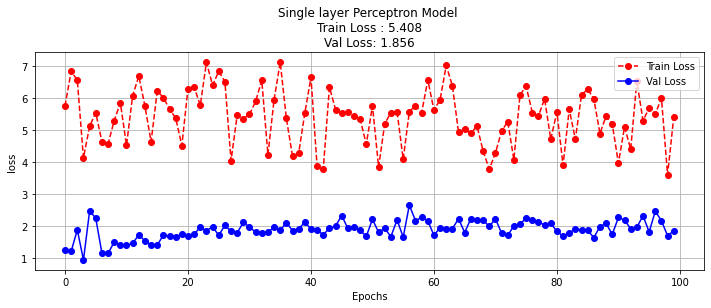

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.plot(train_metrics_mean_row[0], '--o', color = 'red', label = 'Train Loss')
plt.plot(val_metrics_row[0], '-o', color = 'blue', label = 'Val Loss')

plt.title('Single layer Perceptron Model \nTrain Loss : {:.3f}\nVal Loss: {:.3f}'.format(train_metrics_mean_row[0][-1] , val_metrics_row[0][-1]))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.show()
